In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train_df = pd.read_csv('../../../이적료_예측/FIFA_train.csv', encoding='utf-8')
train_df

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [3]:
test_df = pd.read_csv('../../../이적료_예측/FIFA_test.csv', encoding='utf-8')
test_df

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0
...,...,...,...,...,...,...,...,...,...,...,...
3823,16924,R. Takae,20,asia,2021,MF,right,1.0,48,63,2.0
3824,16929,L. Wahlstedt,18,europe,2018,GK,right,1.0,48,65,1.0
3825,16932,Y. Góez,18,south america,2021,MF,right,1.0,48,65,2.0
3826,16937,A. Kaltner,18,europe,2020,ST,right,1.0,47,61,2.0


In [4]:
train_df = train_df.set_index(['id'])
test_df = test_df.set_index(['id'])

train_df = train_df.drop(['name'], axis=1)
test_df = test_df.drop(['name'], axis=1)

train_df

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
id,,,,,,,,,,
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
3,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
7,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
8,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
9,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...
16925,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
16936,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
16941,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0


### 추가 EDA

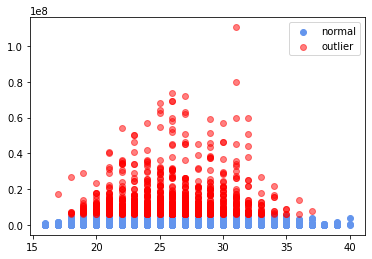

total normal :  7754
total outlier :  1178


In [5]:
Q1 = train_df['value'].describe()['25%'] # 계약금의 1분위수
Q3 = train_df['value'].describe()['75%'] # 계약금의 3분위수
IQR = Q3-Q1

# 정상 데이터
temp = train_df.loc[(train_df['value'] > (Q1 - 1.5*IQR)) & (train_df['value'] < (Q3 + 1.5*IQR)),:]

# 이상치 데이터
outlier_0 = train_df.loc[(train_df['value'] > (Q3 + 1.5*IQR)),:]

plt.scatter(temp['age'], temp['value'], label='normal', color='cornflowerblue')
plt.scatter( outlier_0['age'], outlier_0['value'], label='outlier', color='red', alpha=0.5)
plt.legend(loc='upper right')
plt.show()

print('total normal : ', temp['value'].count())
print('total outlier : ', outlier_0['value'].count())

- outlier로 판단되는 개수가 너무 많다.  
 -> 임의로 outlier의 기준을 정하여 outlier 총 개수를 줄여서 확인

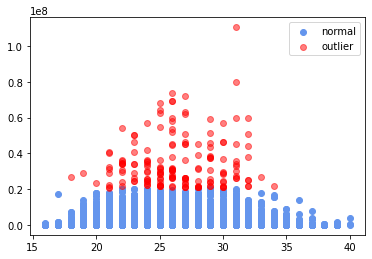

total normal :  8765
total outlier :  167


In [6]:
# outlier의 기준을 value > 20,000,000 으로 지정
out_val = 20000000

# 정상 데이터
temp = train_df.loc[(train_df['value'] <= out_val),:]

# 이상치 데이터
outlier = train_df.loc[(train_df['value'] > out_val),:]

plt.scatter(temp['age'], temp['value'], label='normal', color='cornflowerblue')
plt.scatter(outlier['age'], outlier['value'], label='outlier', color='red', alpha=0.5)
plt.legend(loc='upper right')
plt.show()

print('total normal : ', temp['value'].count())
print('total outlier : ', outlier['value'].count())

In [7]:
outlier.describe()

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,167.000000,167.000000,167.000000,167.000000,167.000000,1.670000e+02
mean,26.377246,2.676647,84.161677,86.568862,3.197605,3.500000e+07
std,3.240587,0.873088,2.660096,2.869614,1.093461,1.454708e+07
min,18.000000,1.000000,80.000000,82.000000,1.000000,2.050000e+07
25%,24.000000,2.000000,82.000000,84.000000,2.000000,2.450000e+07
50%,26.000000,3.000000,84.000000,86.000000,3.000000,3.050000e+07
75%,29.000000,3.000000,85.500000,89.000000,4.000000,4.075000e+07
max,34.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


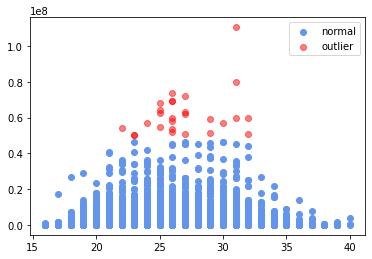

total bnormal :  8905
total outlier :  27


In [8]:
# outlier의 기준을 value > 50,000,000 으로 지정
out_val = 50000000

# 정상 데이터
temp = train_df.loc[(train_df['value'] <= out_val),:]

# 이상치 데이터
outlier_2 = train_df.loc[(train_df['value'] > out_val),:]

plt.scatter(temp['age'], temp['value'], label='normal', color='cornflowerblue')
plt.scatter(outlier_2['age'], outlier_2['value'], label='outlier', color='red', alpha=0.5)
plt.legend(loc='upper right')
plt.show()

print('total bnormal : ', temp['value'].count())
print('total outlier : ', outlier_2['value'].count())

In [9]:
outlier_2.describe()

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,27.000000,27.000000,27.000000,27.000000,27.000000,2.700000e+01
mean,26.925926,3.407407,88.259259,90.185185,3.074074,6.200000e+07
std,2.800081,0.693889,2.086451,1.710534,1.206582,1.248615e+07
min,22.000000,2.000000,85.000000,87.000000,1.000000,5.050000e+07
25%,25.000000,3.000000,87.000000,89.000000,2.000000,5.375000e+07
50%,26.000000,3.000000,88.000000,90.000000,3.000000,5.950000e+07
75%,29.000000,4.000000,89.000000,91.000000,4.000000,6.600000e+07
max,32.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


> 이적료가 높은 선수는 Age가 22 ~ 32세 임을 활용하여, Age변수를 22 ~ 32, 22 ~ 32가 아닌 나머지로 나누어 범주형 파생변수를 생성한다.

In [10]:
train_df = train_df.drop(index=outlier.index) # outlier 제거

### 전처리

#### 1. Age변수 범주형으로 파생변수 생성

In [11]:
def golden_time(x):
    if x >= 22 and x <= 32:
        return 'o'
    else:
        return 'x'

In [12]:
train_df['golden_age'] = train_df['age'].apply(lambda x : golden_time(x))
test_df['golden_age'] = test_df['age'].apply(lambda x : golden_time(x))

train_df

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,golden_age
id,,,,,,,,,,,
41,40,europe,2019,GK,right,4.0,88,88,1.0,4000000.0,x
75,33,south america,2020,MF,right,3.0,86,86,3.0,18000000.0,x
102,35,south america,2020,DF,right,3.0,85,85,2.0,9000000.0,x
108,35,europe,2019,DF,right,4.0,85,85,2.0,9000000.0,x
109,36,europe,2022,ST,right,5.0,85,85,5.0,14000000.0,x
...,...,...,...,...,...,...,...,...,...,...,...
16925,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0,x
16936,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0,x
16941,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0,x


#### 2. 데이터 형변환 및 오기입 데이터 수정

In [13]:
# reputation 변수 int형으로 치환
train_df['reputation'] = train_df['reputation'].astype('int')
test_df['reputation'] = test_df['reputation'].astype('int')
# stat_skill_moves 변수 int형으로 치환
train_df['stat_skill_moves'] = train_df['stat_skill_moves'].astype('int')
test_df['stat_skill_moves'] = test_df['stat_skill_moves'].astype('int')

# contract_until 변수에서 년도만 추출
train_df['contract_until'] = train_df['contract_until'].apply(lambda x:x[-4:])
test_df['contract_until'] = test_df['contract_until'].apply(lambda x:x[-4:])

#### 3. 범주형 변수 onehot encoding

In [14]:
for i in ['continent', 'contract_until', 'position', 'prefer_foot', 'reputation', 'stat_skill_moves', 'golden_age']:
    train_df = pd.get_dummies(train_df, columns = [i])
    test_df = pd.get_dummies(test_df, columns = [i])

#### 4. Test 데이터에만 있는 'contract_until_2026' 변수를 Train 데이터에 추가

In [15]:
print(train_df.columns)
print(test_df.columns)

Index(['age', 'stat_overall', 'stat_potential', 'value', 'continent_africa',
       'continent_asia', 'continent_europe', 'continent_oceania',
       'continent_south america', 'contract_until_2018', 'contract_until_2019',
       'contract_until_2020', 'contract_until_2021', 'contract_until_2022',
       'contract_until_2023', 'contract_until_2024', 'contract_until_2025',
       'position_DF', 'position_GK', 'position_MF', 'position_ST',
       'prefer_foot_left', 'prefer_foot_right', 'reputation_1', 'reputation_2',
       'reputation_3', 'reputation_4', 'reputation_5', 'stat_skill_moves_1',
       'stat_skill_moves_2', 'stat_skill_moves_3', 'stat_skill_moves_4',
       'stat_skill_moves_5', 'golden_age_o', 'golden_age_x'],
      dtype='object')
Index(['age', 'stat_overall', 'stat_potential', 'continent_africa',
       'continent_asia', 'continent_europe', 'continent_oceania',
       'continent_south america', 'contract_until_2018', 'contract_until_2019',
       'contract_until_2020', 

In [16]:
train_df['contract_until_2026'] = 0
train_df

,age,stat_overall,stat_potential,value,continent_africa,continent_asia,continent_europe,continent_oceania,continent_south america,contract_until_2018,...,reputation_4,reputation_5,stat_skill_moves_1,stat_skill_moves_2,stat_skill_moves_3,stat_skill_moves_4,stat_skill_moves_5,golden_age_o,golden_age_x,contract_until_2026
id,,,,,,,,,,,,,,,,,,,,,
41,40,88,88,4000000.0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
75,33,86,86,18000000.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
102,35,85,85,9000000.0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
108,35,85,85,9000000.0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
109,36,85,85,14000000.0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16925,18,48,63,60000.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
16936,19,47,59,40000.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
16941,18,47,64,50000.0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


### train validation 분할

In [17]:
from sklearn.model_selection import train_test_split

x = train_df.drop(['value'], axis=1)
y = train_df['value']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=17)

### 표준화

In [18]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
st.fit(x_train)

# scaled_train = pd.DataFrame(st.transform(x_train), columns=train_df.drop(['value'],axis=1).columns)
# scaled_val = pd.DataFrame(st.transform(x_valid), columns=train_df.drop(['value'],axis=1).columns)
# scaled_test = pd.DataFrame(st.transform(test_df), columns=test_df.columns)

StandardScaler()

### 정규화

In [19]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
mm.fit(x_train)

sscaled_train = pd.DataFrame(mm.transform(x_train), columns=x_train.columns)
sscaled_val = pd.DataFrame(mm.transform(x_valid), columns=x_valid.columns)
sscaled_test = pd.DataFrame(mm.transform(test_df), columns=test_df.columns)

# sscaled_train = pd.DataFrame(mm.transform(scaled_train), columns=scaled_train.columns)
# sscaled_val = pd.DataFrame(mm.transform(scaled_val), columns=scaled_val.columns)
# sscaled_test = pd.DataFrame(mm.transform(scaled_test), columns=scaled_test.columns)

C:\Users\dydgm\anaconda3\envs\DA\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [20]:
sscaled_train

,age,stat_overall,stat_potential,continent_africa,continent_asia,continent_europe,continent_oceania,continent_south america,contract_until_2018,contract_until_2019,...,reputation_4,reputation_5,stat_skill_moves_1,stat_skill_moves_2,stat_skill_moves_3,stat_skill_moves_4,stat_skill_moves_5,golden_age_o,golden_age_x,contract_until_2026
0,0.500000,0.615385,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.708333,0.564103,0.452381,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.458333,0.717949,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.333333,0.358974,0.380952,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.791667,0.615385,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6130,0.375000,0.538462,0.571429,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6131,0.166667,0.179487,0.380952,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6132,0.416667,0.435897,0.380952,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6133,0.708333,0.769231,0.642857,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### 모델링 (LGBM)

In [21]:
from lightgbm import LGBMRegressor

x_train, x_valid, x_test = sscaled_train, sscaled_val, sscaled_test

#모델 정의
model = LGBMRegressor()
# 모델 학습
model.fit(x_train, y_train)

# train, valid 데이터 예측
valid_pred = model.predict(x_valid)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

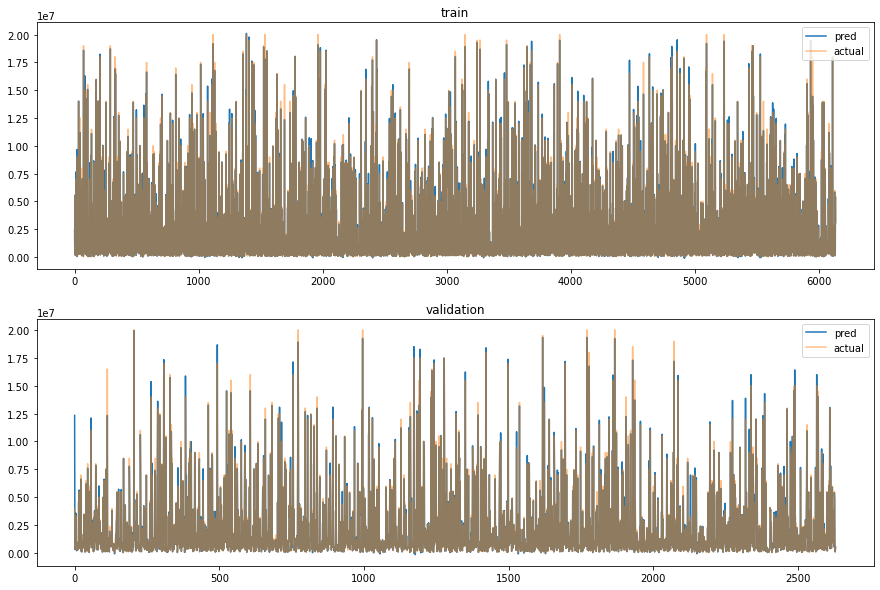

In [22]:
fig, ax = plt.subplots(2,1,figsize=(15,10))

ax1 = plt.subplot(2,1,1)
ax1.plot(train_pred, label='pred')
ax1.plot(y_train.values, label='actual', alpha=0.5)
ax1.legend(loc='upper right')
ax1.set_title('train')

ax2 = plt.subplot(2,1,2)
ax2.plot(valid_pred, label='pred')
ax2.plot(y_valid.values, label='actual', alpha=0.5)
ax2.legend(loc='upper right')
ax2.set_title('validation')

plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

def rmse(act, pred):
    return mean_squared_error(act, pred)**0.5

print('< train >')
print('RMSE : ', rmse(y_train, train_pred))
print('MAPE : ', mean_absolute_percentage_error(y_train, train_pred))

print('< validation >')
print('RMSE : ', rmse(y_valid, valid_pred))
print('MAPE : ', mean_absolute_percentage_error(y_valid, valid_pred))

< train >
RMSE :  213096.04361213127
MAPE :  0.07268596150499833
< validation >
RMSE :  317672.35341581015
MAPE :  0.08392320157883791


### 모델링 (CatBoost)

In [24]:
from sklearn.model_selection import GridSearchCV, KFold
from catboost import CatBoostRegressor
import random

In [25]:
param = {'depth' : [2,3,4,5,6,7,8,9,10],
         'learning_rate' : [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.25]}

grid_cat = GridSearchCV(CatBoostRegressor(random_state = 17), 
                        param, 
                        cv = KFold(n_splits = 4, shuffle = True, random_state = 17), 
                        scoring = 'neg_mean_squared_error', 
                        n_jobs = -1,
                       verbose = 1)

In [26]:
grid_cat.fit(x_train, y_train)

Fitting 4 folds for each of 72 candidates, totalling 288 fits


KeyboardInterrupt: 

In [ ]:
cat = CatBoostRegressor(random_state = 2020, **grid_cat.best_params_)
cat.fit(x_train, y_train)
cat.fit(X, y)

In [ ]:
# cat = CatBoostRegressor(**cat_param)

# cat_features =range(x_test.shape[1])

# cat.fit(x_train, y_train, 
#         eval_set=[(x_train, y_train), (x_valid,y_valid)],
#         early_stopping_rounds=35, cat_features=cat_features,
#         verbose=100)

In [ ]:
valid_pred = cat.predict(x_valid)
train_pred = cat.predict(x_train)
test_pred = cat.predict(x_test)

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(15,10))

ax1 = plt.subplot(2,1,1)
ax1.plot(train_pred, label='pred')
ax1.plot(y_train.values, label='actual', alpha=0.5)
ax1.legend(loc='upper right')
ax1.set_title('train')

ax2 = plt.subplot(2,1,2)
ax2.plot(valid_pred, label='pred')
ax2.plot(y_valid.values, label='actual', alpha=0.5)
ax2.legend(loc='upper right')
ax2.set_title('validation')

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

def rmse(act, pred):
    return mean_squared_error(act, pred)**0.5

print('< train >')
print('RMSE : ', rmse(y_train, train_pred))
print('MAPE : ', mean_absolute_percentage_error(y_train, train_pred))

print('< validation >')
print('RMSE : ', rmse(y_valid, valid_pred))
print('MAPE : ', mean_absolute_percentage_error(y_valid, valid_pred))

### submission 파일 생성

In [ ]:
submission  = pd.read_csv('../../../이적료_예측/submission.csv')
submission['value'] = test_pred

In [ ]:
submission.head()

In [ ]:
submission.to_csv('../../../이적료_예측/0528.csv',index = False)